In [104]:
import pandas as pd
import numpy as np

In [105]:
df = pd.read_csv('mbti_celebrities.csv')
categories = df['category'].unique()

categories

array(['Sports', 'Political', 'Pop Culture', 'Science', 'Business',
       'The Arts', 'Noteworthy', 'Musician', 'Kpop', 'Internet',
       'Religion', 'Historical'], dtype=object)

In [106]:
# filter out all rows with category Religion and Historical
df_filtered = df[~df["category"].isin(["Religion", "Historical"])]
len(df_filtered), len(df)

(46392, 50878)

In [107]:
df_filtered_popular = df_filtered[
    ~df_filtered["subcategory"].isin(
        [
            "VOCALOID",
            "Virtual Youtubers",
            "TikTok Stars",
            "Niche Content Creators",
            "Hosts, Critics, Producers & Editors",
            "Internet Personalities (Other)",
            "Characters of Brandon Rogers",
            "General Vloggers",
            "ASMR Artists",
            "Renaissance Men",
            "Buzzfeed Employees",
            "Famous For Being Famous",
            "Film & TV Crew",
            "Without a Category",
            "Tycoons of the Past",
            "Religion & Spirituality",
            "Linguists ",
            "Historians",
            "Social, Cultural & Political Commentators",
            "Animated/Fictional Musicians",
            "Online Fictional Characters",
            "Political Commentators",
            "Mystery, Horror & True Crime",
            "Psychology & Personal Development",
        ]
    )
]

In [108]:
subcats = df_filtered_popular["subcategory"].unique()
subcats

array(['Baseball', 'Presidents of the USA', 'Actors and Actresses (USA)',
       'People of Classic Hollywood', 'Actors & Actresses (Canada)',
       'Actors & Actresses (Oceania)', 'Basketball', 'Football (Soccer)',
       'Football (American)', 'Golf', 'Tennis', 'Hockey',
       'Science, Other', 'Technology', 'Business',
       'Writers (Literature, Modern)', 'Writers (Literature, Classic)',
       'Hosts & Presenters', 'Criminals', 'Performers', 'Film Directors',
       'Government\xa0(World)', 'Activists', 'Government\xa0(USA)',
       'Models', 'News & Journalists', 'Ice skating',
       'Biology & Medicine\xa0', 'Radicals', 'Boxing', 'Martial Arts',
       'People of Law', 'Swimming & Diving', 'Poker', 'MMA', 'Artists',
       'Classical', 'Culinary Arts', 'Weightlifting & Strongmen',
       'Skiing & Snowboarding', 'Kpop', 'Asia, Musicians',
       'Classic Pop & Contemporary', 'European, Musicians',
       'Turkish, Musicians', 'World, Musicians', 'Movie Composers',
       'La

In [109]:
df_filtered_popular.to_csv("filtered_mbti.csv", index=False)
df = df_filtered_popular

C:\Users\Oz\AppData\Local\Temp\ipykernel_21876\2002343042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['four_letter_total_voted'] = pd.to_numeric(df['four_letter_total_voted'], errors='coerce')


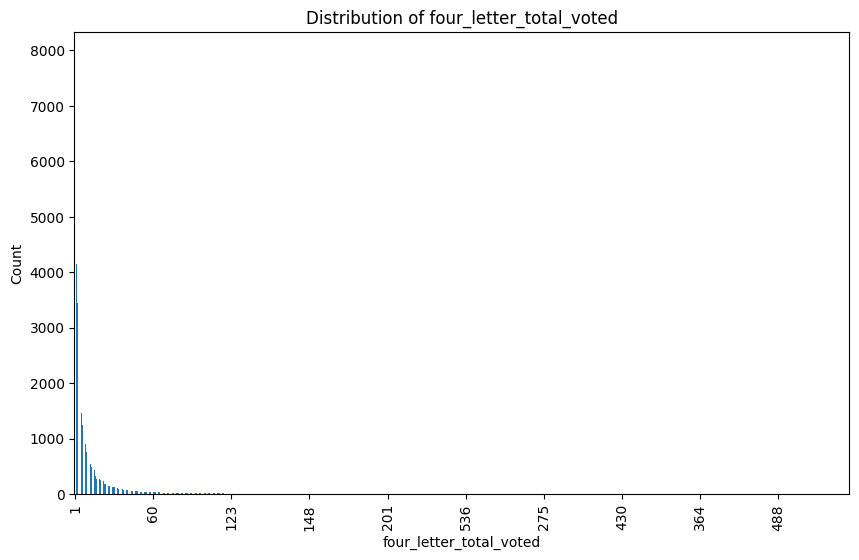

In [110]:
# find data distribution of four_letter_total_voted
df['four_letter_total_voted'] = pd.to_numeric(df['four_letter_total_voted'], errors='coerce')
four_letter_total_voted_counts = df['four_letter_total_voted'].value_counts()
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
four_letter_total_voted_counts.plot(kind='bar')
plt.title('Distribution of four_letter_total_voted')
plt.locator_params(axis='x', nbins=10)
plt.xlabel('four_letter_total_voted')
plt.ylabel('Count')
plt.show()

In [111]:
ranges = [0, 10, 20, 30, 40, 50, 1e9]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50+']

# display how many entries have counts fall into each bin
df['four_letter_total_voted_binned'] = pd.cut(df['four_letter_total_voted'], bins=ranges, labels=labels, right=False)
binned_counts = df['four_letter_total_voted_binned'].value_counts().sort_index()
binned_counts

C:\Users\Oz\AppData\Local\Temp\ipykernel_21876\1508692951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['four_letter_total_voted_binned'] = pd.cut(df['four_letter_total_voted'], bins=ranges, labels=labels, right=False)


four_letter_total_voted_binned
0-9      24670
10-19     4855
20-29     1965
30-39     1067
40-49      620
50+       2744
Name: count, dtype: int64

In [112]:
df_good_quality = df[df['four_letter_total_voted'] >= 20]
# count each respective class in four_letter
four_letter_counts = df_good_quality["four_letter"].value_counts()
four_letter_counts

four_letter
ENFP    691
ENTP    680
INFP    612
INTP    527
INFJ    478
ISFP    438
ESFP    406
INTJ    405
ESTP    362
ENFJ    358
ISTP    328
ESFJ    256
ENTJ    250
ISFJ    229
ESTJ    209
ISTJ    167
Name: count, dtype: int64

In [113]:
# Assume df_good_quality already exists and has columns:
# 'four_letter' and 'four_letter_total_voted'

# 1. Sort so that the highest-voted entries come first within each class
df_sorted = df_good_quality.sort_values(
    by=["four_letter", "four_letter_total_voted"], ascending=[True, False]
)

# 2. Take at most 200 rows per MBTI class
max_per_class = 200
df_balanced = df_sorted.groupby("four_letter", group_keys=False).head(max_per_class)

# Optional: check the class distribution and size
print(df_balanced["four_letter"].value_counts())
print("Total rows:", len(df_balanced))
df_balanced.to_csv("balanced_mbti.csv", index=False)

four_letter
ENFJ    200
ENFP    200
ENTJ    200
ENTP    200
ESFJ    200
ESFP    200
ESTJ    200
ESTP    200
INFJ    200
INFP    200
INTJ    200
INTP    200
ISFJ    200
ISFP    200
ISTP    200
ISTJ    167
Name: count, dtype: int64
Total rows: 3167
